import all files in the folder

In [412]:
import os
from pathlib import Path
from astropy.io import fits

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/"
files =  [ p for p in Path(path).glob('*.fit') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

In [413]:
data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [414]:
data_dict['sun-0001.fit']

array([[593, 554, 532, ..., 549, 537, 316],
       [541, 645, 507, ..., 619, 505, 294],
       [568, 601, 560, ..., 527, 517, 331],
       ...,
       [458, 484, 401, ..., 454, 458, 323],
       [430, 463, 447, ..., 387, 483, 292],
       [480, 468, 476, ..., 513, 430, 333]], dtype=uint16)

In [415]:
data_headers['sun-0001.fit']

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1391 /fastest changing axis                           
NAXIS2  =                 1039 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2021-11-12T08:53:57' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =  0.47999999999999998 /Exposure time in seconds                        
EXPOSURE=  0.47999999999999998 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.020000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   6.45000000000000

In [416]:
data_headers['sun-0001.fit']['DATE-OBS']

'2021-11-12T08:53:57'

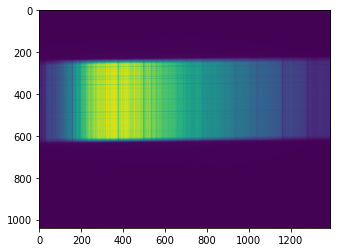

In [417]:
import matplotlib.pyplot as plt 
plt.imshow(data_dict['sun2-0001.fit'])

In [418]:
#plt.plot(data_dict['sun2-0001.fit'][0],data_dict['sun2-0001.fit'][1], '.')

## Stacking

import only sky-zenith files

In [419]:
import os
from pathlib import Path
from astropy.io import fits

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/20201109 sky zenith/"
files =  [ p for p in Path(path).glob('skyspectrum*') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [420]:
data_dict.keys()

dict_keys(['skyspectrum zenit-0001.fit', 'skyspectrum zenit-0002.fit', 'skyspectrum zenit-0003.fit', 'skyspectrum zenit-0004.fit', 'skyspectrum zenit-0005.fit', 'skyspectrum zenit-0006.fit', 'skyspectrum zenit-0007.fit', 'skyspectrum zenit-0008.fit', 'skyspectrum zenit-0009.fit', 'skyspectrum zenit-0010.fit', 'skyspectrum zenit-0011.fit', 'skyspectrum zenit-0012.fit', 'skyspectrum zenit-0013.fit', 'skyspectrum zenit-0014.fit', 'skyspectrum zenit-0015.fit', 'skyspectrum zenit-0016.fit', 'skyspectrum zenit-0017.fit', 'skyspectrum zenit-0018.fit', 'skyspectrum zenit-0019.fit', 'skyspectrum zenit-0020.fit'])

In [421]:
data_dict['skyspectrum zenit-0001.fit']

array([[450, 469, 479, ..., 424, 434, 341],
       [509, 469, 507, ..., 445, 444, 326],
       [476, 495, 446, ..., 443, 463, 298],
       ...,
       [469, 425, 388, ..., 418, 428, 318],
       [451, 437, 419, ..., 390, 463, 331],
       [489, 411, 483, ..., 408, 423, 316]], dtype=uint16)

In [422]:
import numpy as np
stack = np.median([ x for x in data_dict.values()], axis=0)

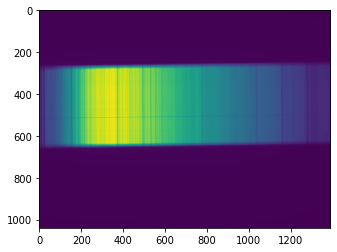

In [423]:
plt.imshow(stack)

cf. non-stacked image

In [424]:
#plt.imshow(data_dict['sun2-0001.fit'])

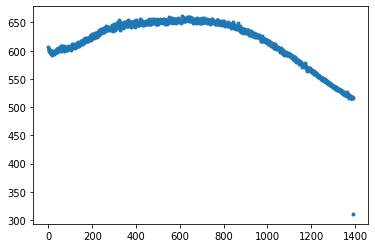

In [425]:
#plt.xlim(500,1000)
plt.plot(np.median(stack[:], axis=0), '.')

Taking the mean can be done over the entire stack and still gives a valid spectrum unlike median.

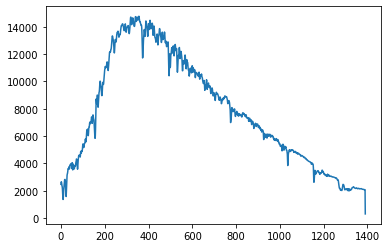

In [433]:
plt.plot(np.mean(stack[:], axis=0))

crop the stack

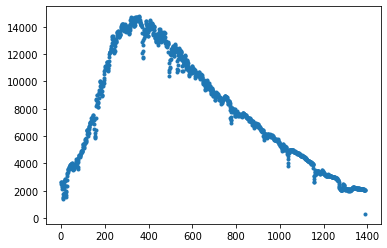

In [434]:
plt.plot(np.mean(stack[:], axis=0), '.')

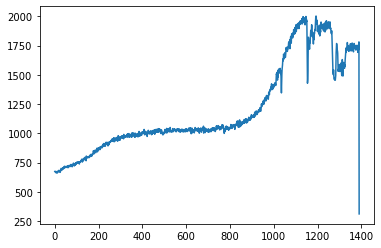

In [435]:
plt.plot(np.median(stack[0:500], axis=0))

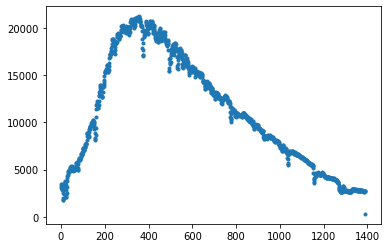

In [429]:
plt.plot(np.median(stack[0:750], axis=0), '.')

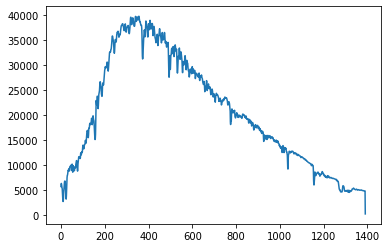

In [430]:
plt.plot(np.median(stack[300:800], axis=0))

In [440]:
print(len(stack))

1039


## Calibration

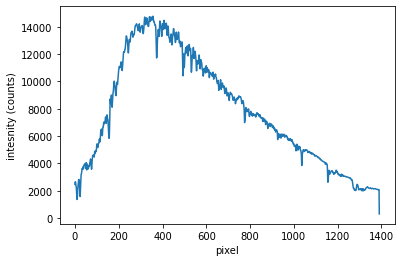

In [442]:
spectrum = np.mean(stack[:], axis=0)
#plt.xticks(range(0, 1500, 100))
plt.xlabel('pixel')
plt.ylabel('intesnity (counts)')
plt.plot(spectrum)

In [437]:
import numpy as np
from scipy.signal import argrelextrema

minima = argrelextrema(spectrum, np.less)
len(minima[0])

200

In [438]:
for i in minima[0]:
    print(f'{i} : {spectrum[i]}')

10 : 1367.7329162656401
24 : 1583.990375360924
35 : 3589.070741097209
38 : 3601.7916265640038
49 : 3629.9143407122233
54 : 3529.9918190567855
61 : 3603.8046198267566
66 : 3789.667949951877
76 : 3583.6275264677574
83 : 4568.465351299326
88 : 4470.907122232917
93 : 4748.59624639076
97 : 4902.287776708374
104 : 5165.007699711261
114 : 5578.756977863331
120 : 6438.7343599615015
125 : 6036.893647738209
134 : 6908.350818094322
143 : 6935.894128970163
156 : 5839.762271414822
164 : 8375.259384023098
170 : 8114.564966313763
187 : 8962.58469682387
194 : 9780.401828681424
205 : 10997.133782483157
216 : 10799.682868142445
226 : 12155.130895091434
244 : 12086.145813282003
252 : 12886.399422521656
259 : 13572.46583253128
265 : 13237.373917228104
270 : 13415.061116458133
289 : 13714.715591915303
298 : 13600.755534167469
304 : 13967.933108758421
312 : 13497.689124157843
323 : 14153.61645813282
336 : 14026.525505293552
344 : 14387.761790182869
351 : 14496.958132820018
360 : 14365.683349374398
366 : 141

In [439]:
i = -1
for x in spectrum:
    print(f'{(i := i + 1)} : {x}')

0 : 2475.4398460057746
1 : 2613.906159769009
2 : 2664.3633301251202
3 : 2610.2589027911454
4 : 2469.4162656400385
5 : 2357.124639076035
6 : 2291.213666987488
7 : 2105.675649663138
8 : 1786.2930702598653
9 : 1482.6049085659288
10 : 1367.7329162656401
11 : 1543.2487969201154
12 : 1872.0505293551491
13 : 2114.5182868142447
14 : 2308.6804619826758
15 : 2535.0178055822907
16 : 2725.762752646776
17 : 2817.923965351299
18 : 2830.3166506256016
19 : 2829.5789220404235
20 : 2698.0394610202115
21 : 2369.1270452358035
22 : 2012.371511068335
23 : 1662.5269489894129
24 : 1583.990375360924
25 : 1898.9379210779596
26 : 2350.6390760346485
27 : 2788.6053897978827
28 : 3115.939364773821
29 : 3229.76708373436
30 : 3268.5336862367662
31 : 3390.0794032723775
32 : 3542.657362848893
33 : 3627.226179018287
34 : 3604.0476419634265
35 : 3589.070741097209
36 : 3713.905197305101
37 : 3751.0721847930704
38 : 3601.7916265640038
39 : 3627.375842155919
40 : 3808.2709335899904
41 : 3881.7733397497595
42 : 3888.42877767

obtaining Fraunhofer lines

In [ ]:
import pandas as pd
df_fl = pd.read_csv('fraunhofer_lines.csv')
df_fl.keys()


In [ ]:
plt.xlabel('wavelength (nm)')
plt.ylabel('intensity (counts)')
plt.plot(df_fl['wavelength'], df_fl['intensity'], '.')

In [ ]:
plt.xlabel('pixel')
plt.ylabel('wavelength (nm)')
plt.plot(df_fl['pixel'], df_fl['wavelength'], '.')

In [ ]:
from lmfit import models
model = models.LinearModel()
fit = model.fit(x=df_fl['pixel'], data=df_fl['wavelength'])
print(fit.params['slope'])
print(fit.params['intercept'])

In [ ]:
fit.plot(xlabel='pixel', ylabel='Wavelength (nm)')

In [ ]:
def pixel_to_wavelength(pixel):
    return fit.values['slope'] * pixel + fit.values['intercept']

In [ ]:
len(spectrum)

In [ ]:
wavelengths = pixel_to_wavelength(range(len(spectrum)))

In [ ]:
plt.xlabel('wavelength (nm)')
plt.ylabel('intensity (counts)')
plt.plot(wavelengths, spectrum, '.')